In [1]:
!python -V

Python 3.12.1


In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer

In [7]:
df = pd.read_parquet("./data/green_tripdata_2021-01.parquet")

In [8]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [9]:
df["trip_type"].value_counts()

trip_type
1.0    39233
2.0     1238
Name: count, dtype: int64

In [10]:
df.shape

(76518, 20)

In [11]:
dt = df[df.trip_type == 2]

In [12]:
dt

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,0.0,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,0.0,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,0.0,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,0.0,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,0.0,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,0.0,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,0.0,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,0.0,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0


In [13]:
dt_pickup = pd.to_datetime(dt["lpep_pickup_datetime"])

In [14]:
dt_dropoff = pd.to_datetime(dt["lpep_dropoff_datetime"])

In [15]:
dt["lpep_pickup_datetime"].dtype

dtype('<M8[us]')

In [20]:
dt["lpep_pickup_datetime"].dtype

dtype('<M8[us]')

In [17]:
dt_pickup.dtypes

dtype('<M8[us]')

In [18]:
dt.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [21]:
dt["duration"] = dt_dropoff - dt_pickup

/tmp/ipykernel_2043/1741232879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["duration"] = dt_dropoff - dt_pickup


In [22]:
dt

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0 days 00:00:07
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0 days 00:00:02
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,0 days 00:19:46
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,0 days 02:01:12
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0 days 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,0 days 00:09:27
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,0 days 00:35:02
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0 days 00:00:40
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0 days 00:00:03


In [23]:
td = dt["duration"].iloc[1]

In [25]:
td0 = dt["duration"].iloc[0]

In [24]:
print(td)

0 days 00:00:02


In [26]:
print(td0)

0 days 00:00:07


In [27]:
td.total_seconds() / 60

0.03333333333333333

In [28]:
dt["duration"].dtype

dtype('<m8[us]')

In [29]:
dt["duration"] = dt["duration"].apply(lambda td: td.total_seconds() / 60)

/tmp/ipykernel_2043/3986632842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["duration"] = dt["duration"].apply(lambda td: td.total_seconds() / 60)


In [30]:
dt

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


In [31]:
dt["VendorID"].dtype

dtype('int64')

In [32]:
dt_dropoff.dtype

dtype('<M8[us]')

In [33]:
dt_pickup.dtype

dtype('<M8[us]')

In [34]:
dt["lpep_pickup_datetime"].dtype

dtype('<M8[us]')

In [35]:
dt["duration"].dtype

dtype('float64')

/tmp/ipykernel_2043/1490951267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt.duration)


<Axes: xlabel='duration', ylabel='Density'>

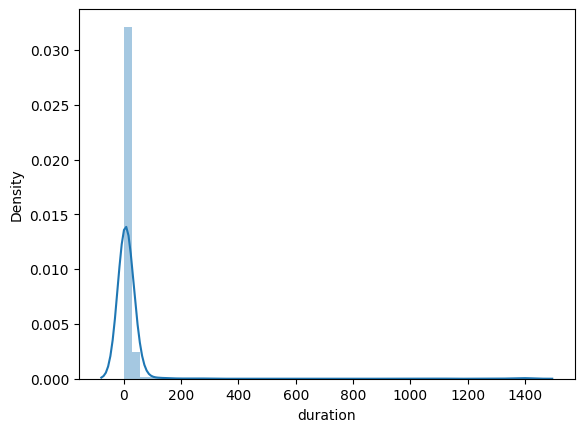

In [36]:
sns.distplot(dt.duration)

In [37]:
dt.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,1238.000000,1238,1238,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.0,1238.000000,1238.000000
mean,1.938611,2021-01-16 05:59:18.515347,2021-01-16 06:17:36.844911,4.948304,127.220517,152.746365,1.264943,2.159968,21.256680,0.001212,0.008078,1.060646,0.104491,0.274798,22.830299,1.418417,2.0,0.124394,18.305493
min,1.000000,2021-01-01 00:19:14,2021-01-01 00:19:21,1.000000,1.000000,1.000000,0.000000,0.000000,-280.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,-280.300000,1.000000,2.0,0.000000,0.000000
25%,2.000000,2021-01-08 20:20:59.750000,2021-01-08 20:42:03.750000,5.000000,69.000000,74.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.300000,10.300000,1.000000,2.0,0.000000,0.100000
50%,2.000000,2021-01-15 22:35:00.500000,2021-01-15 22:58:12.500000,5.000000,97.500000,152.000000,1.000000,0.205000,14.000000,0.000000,0.000000,0.000000,0.000000,0.300000,15.300000,1.000000,2.0,0.000000,1.666667
75%,2.000000,2021-01-23 12:24:37,2021-01-23 12:29:15.750000,5.000000,195.000000,243.000000,1.000000,2.797500,20.000000,0.000000,0.000000,1.000000,0.000000,0.300000,23.050000,2.000000,2.0,0.000000,14.216667
max,2.000000,2021-01-31 21:48:08,2021-01-31 22:11:17,5.000000,265.000000,265.000000,8.000000,64.700000,284.000000,1.000000,0.500000,38.000000,17.870000,0.300000,284.300000,4.000000,2.0,2.750000,1416.100000
std,0.240140,NaN,NaN,0.451971,77.287748,85.334912,0.768782,4.257244,31.238374,0.031765,0.063061,2.757900,1.006129,0.094701,32.057506,0.560964,0.0,0.571729,108.364382


In [38]:
dt["duration"].describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [39]:
dt = dt[(dt.duration >= 1) & (dt.duration <= 60)]

In [40]:
dt

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.0,0.0,None,0.3,13.3,2.0,2.0,0.0,19.766667
53,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.0,0.0,None,0.3,18.3,2.0,2.0,0.0,20.733333
69,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,0.0,0.0,None,0.3,9.3,2.0,2.0,0.0,8.166667
88,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,0.0,0.0,None,0.3,15.3,2.0,2.0,0.0,12.983333
96,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,7.0,0.0,None,0.3,57.3,1.0,2.0,0.0,5.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40324,2,2021-01-31 18:42:52,2021-01-31 19:08:44,N,5.0,69,213,2.0,5.40,16.0,...,0.0,0.0,0.0,None,0.3,16.3,2.0,2.0,0.0,25.866667
40352,1,2021-01-31 19:32:22,2021-01-31 19:50:16,N,5.0,82,129,2.0,2.40,0.0,...,0.0,0.0,0.0,None,0.0,0.0,2.0,2.0,0.0,17.900000
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.0,0.0,None,0.3,10.3,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.0,0.0,None,0.3,30.3,2.0,2.0,0.0,35.033333


In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 30 to 40430
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               640 non-null    int64         
 1   lpep_pickup_datetime   640 non-null    datetime64[us]
 2   lpep_dropoff_datetime  640 non-null    datetime64[us]
 3   store_and_fwd_flag     640 non-null    object        
 4   RatecodeID             640 non-null    float64       
 5   PULocationID           640 non-null    int64         
 6   DOLocationID           640 non-null    int64         
 7   passenger_count        640 non-null    float64       
 8   trip_distance          640 non-null    float64       
 9   fare_amount            640 non-null    float64       
 10  extra                  640 non-null    float64       
 11  mta_tax                640 non-null    float64       
 12  tip_amount             640 non-null    float64       
 13  tolls_a

In [42]:
categorical = ["PULocationID", "DOLocationID"]

In [45]:
dt["DOLocationID"].dtype

dtype('int64')

In [43]:
numerical = ["trip_distance"]

In [50]:
dt[categorical] = dt[categorical].astype("str")

/tmp/ipykernel_2043/3620679132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[categorical] = dt[categorical].astype("str")


In [51]:
dt["PULocationID"].dtypes

dtype('O')

In [52]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 30 to 40430
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               640 non-null    int64         
 1   lpep_pickup_datetime   640 non-null    datetime64[us]
 2   lpep_dropoff_datetime  640 non-null    datetime64[us]
 3   store_and_fwd_flag     640 non-null    object        
 4   RatecodeID             640 non-null    float64       
 5   PULocationID           640 non-null    object        
 6   DOLocationID           640 non-null    object        
 7   passenger_count        640 non-null    float64       
 8   trip_distance          640 non-null    float64       
 9   fare_amount            640 non-null    float64       
 10  extra                  640 non-null    float64       
 11  mta_tax                640 non-null    float64       
 12  tip_amount             640 non-null    float64       
 13  tolls_a

In [53]:
dt.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [54]:
dv = DictVectorizer()

In [55]:
train_dicts = df[categorical + numerical].to_dict(orient="records")

In [56]:
x_train = dv.fit_transform(train_dicts)

In [57]:
target = "duration"

In [58]:
y_train = dt[target].values

In [59]:
dv.feature_names_

['DOLocationID', 'PULocationID', 'trip_distance']

In [1]:
x_train

NameError: name 'x_train' is not defined